# 1. PREPROCESSING- remove volume_unit column, add date_time

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]

import seaborn as sns
sns.set_theme(palette="Set2")

In [2]:
df = pd.read_csv("volume.csv")
df

,delivery_date,date,time,client_name,order_direction,material_name,container_volumn,volume_unit
0,2023-05-10T05:41:28.000Z,2023-05-10,05:41:28,STG Transport & Containerdienst GmbH,Stellen,Sand 0-2,11,m³
1,2023-04-24T08:06:58.799Z,2023-04-24,08:06:58,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11,m³
2,2023-04-24T22:00:00.000Z,2023-04-24,22:00:00,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11,m³
3,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11,m³
4,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11,m³
...,...,...,...,...,...,...,...,...
139894,2021-11-03T07:43:12.366Z,2021-11-03,07:43:12,STG Transport & Containerdienst GmbH,Transport,Grünschnitt AVV-Nr.: 200201,7,m³
139895,2021-06-17T22:00:00.000Z,2021-06-17,22:00:00,STG Transport & Containerdienst GmbH,Stellen,Schrott,7,m³
139896,2021-08-24T13:14:15.563Z,2021-08-24,13:14:15,STG Transport & Containerdienst GmbH,Sofortbeladung,Erdaushub AVV-Nr.: 17 05 04,7,m³
139897,2021-06-09T22:00:00.000Z,2021-06-09,22:00:00,STG Transport & Containerdienst GmbH,Transport,Bauschutt sauber,7,m³


In [3]:
df.shape

(139899, 8)

In [4]:
df.isnull().sum()

delivery_date       0
date                0
time                0
client_name         0
order_direction     0
material_name       0
container_volumn    0
volume_unit         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139899 entries, 0 to 139898
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   delivery_date     139899 non-null  object
 1   date              139899 non-null  object
 2   time              139899 non-null  object
 3   client_name       139899 non-null  object
 4   order_direction   139899 non-null  object
 5   material_name     139899 non-null  object
 6   container_volumn  139899 non-null  object
 7   volume_unit       139899 non-null  object
dtypes: object(8)
memory usage: 8.5+ MB


In [6]:
df['container_volumn'].unique()

array(['11', '13', '36', '60', '72', '10', '15', '17', '20', '3', '4',
       '40', '5', '6', '7', '1', '1,1', '1,25', '1,5', '10,0', '11,0',
       '12', '12,0', '14', '15,0', '16', '18', '2', '44', '2,0', '2,5',
       '27', '20,0', '21', '22', '1.46667', '25', '28', '28,0', '24',
       '80', '30', '3,0', '3,5', '3,6', '33', '34', '35', '37', '38',
       '4,5', '65', '5,0', '5,4', '5,5', '68', '7,0', '7,5', '8', '8,0',
       '8,00', '9', '90', '36,0', '12,5', '61', '39', '50', '55'],
      dtype=object)

In [7]:
df['volume_unit'].unique()

array(['m³', 'cbm', 'm3', 'm²', 'qbm'], dtype=object)

In [8]:
# Replace commas with dots in the 'column_name' column
df['container_volumn'] = df['container_volumn'].str.replace(',', '.')

In [9]:
df['container_volumn'].unique()

array(['11', '13', '36', '60', '72', '10', '15', '17', '20', '3', '4',
       '40', '5', '6', '7', '1', '1.1', '1.25', '1.5', '10.0', '11.0',
       '12', '12.0', '14', '15.0', '16', '18', '2', '44', '2.0', '2.5',
       '27', '20.0', '21', '22', '1.46667', '25', '28', '28.0', '24',
       '80', '30', '3.0', '3.5', '3.6', '33', '34', '35', '37', '38',
       '4.5', '65', '5.0', '5.4', '5.5', '68', '7.0', '7.5', '8', '8.0',
       '8.00', '9', '90', '36.0', '12.5', '61', '39', '50', '55'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139899 entries, 0 to 139898
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   delivery_date     139899 non-null  object
 1   date              139899 non-null  object
 2   time              139899 non-null  object
 3   client_name       139899 non-null  object
 4   order_direction   139899 non-null  object
 5   material_name     139899 non-null  object
 6   container_volumn  139899 non-null  object
 7   volume_unit       139899 non-null  object
dtypes: object(8)
memory usage: 8.5+ MB


In [11]:
df.head()

,delivery_date,date,time,client_name,order_direction,material_name,container_volumn,volume_unit
0,2023-05-10T05:41:28.000Z,2023-05-10,05:41:28,STG Transport & Containerdienst GmbH,Stellen,Sand 0-2,11,m³
1,2023-04-24T08:06:58.799Z,2023-04-24,08:06:58,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11,m³
2,2023-04-24T22:00:00.000Z,2023-04-24,22:00:00,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11,m³
3,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11,m³
4,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11,m³


In [12]:
df.drop(columns='volume_unit', inplace=True)

In [13]:
# Convert 'column2' and 'column4' to string datatype
columns_to_convert = ['client_name', 'order_direction','material_name']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139899 entries, 0 to 139898
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   delivery_date     139899 non-null  object
 1   date              139899 non-null  object
 2   time              139899 non-null  object
 3   client_name       139899 non-null  object
 4   order_direction   139899 non-null  object
 5   material_name     139899 non-null  object
 6   container_volumn  139899 non-null  object
dtypes: object(7)
memory usage: 7.5+ MB


In [15]:
print(df.info())
#astype(str) to convert columns to string datatype, it should change the datatype of those columns to 'object' in pandas, 
#and they will be displayed as 'object' in the info() command.
#The 'object' datatype in pandas usually represents string data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139899 entries, 0 to 139898
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   delivery_date     139899 non-null  object
 1   date              139899 non-null  object
 2   time              139899 non-null  object
 3   client_name       139899 non-null  object
 4   order_direction   139899 non-null  object
 5   material_name     139899 non-null  object
 6   container_volumn  139899 non-null  object
dtypes: object(7)
memory usage: 7.5+ MB
None


In [16]:
df['container_volumn'] = df['container_volumn'].astype(float)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139899 entries, 0 to 139898
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   delivery_date     139899 non-null  object 
 1   date              139899 non-null  object 
 2   time              139899 non-null  object 
 3   client_name       139899 non-null  object 
 4   order_direction   139899 non-null  object 
 5   material_name     139899 non-null  object 
 6   container_volumn  139899 non-null  float64
dtypes: float64(1), object(6)
memory usage: 7.5+ MB
None


In [18]:
df.head(5)

,delivery_date,date,time,client_name,order_direction,material_name,container_volumn
0,2023-05-10T05:41:28.000Z,2023-05-10,05:41:28,STG Transport & Containerdienst GmbH,Stellen,Sand 0-2,11.0
1,2023-04-24T08:06:58.799Z,2023-04-24,08:06:58,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11.0
2,2023-04-24T22:00:00.000Z,2023-04-24,22:00:00,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11.0
3,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11.0
4,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11.0


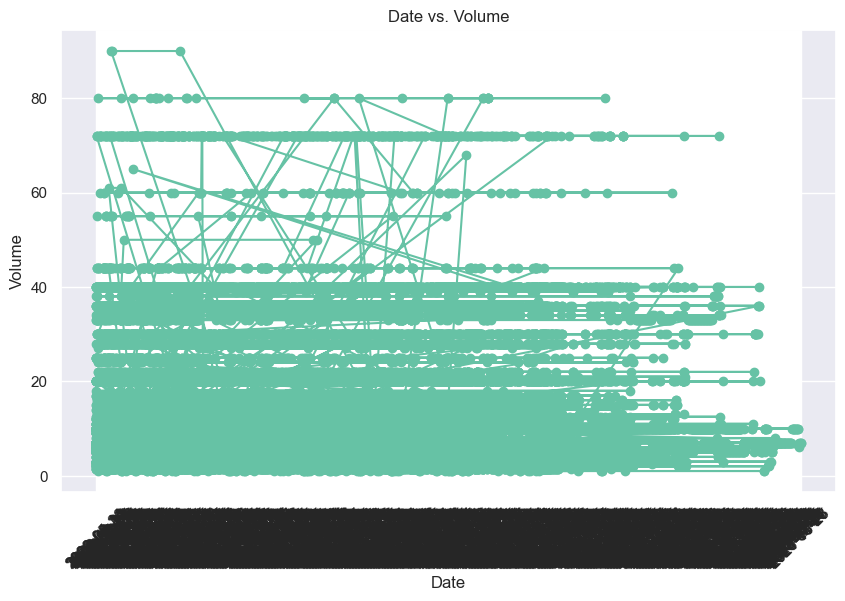

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['container_volumn'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs. Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Print the DataFrame to see the result
df.head()

,delivery_date,date,time,client_name,order_direction,material_name,container_volumn,date_time
0,2023-05-10T05:41:28.000Z,2023-05-10,05:41:28,STG Transport & Containerdienst GmbH,Stellen,Sand 0-2,11.0,2023-05-10 05:41:28
1,2023-04-24T08:06:58.799Z,2023-04-24,08:06:58,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11.0,2023-04-24 08:06:58
2,2023-04-24T22:00:00.000Z,2023-04-24,22:00:00,STG Transport & Containerdienst GmbH,Abziehen,Sand 0-2,11.0,2023-04-24 22:00:00
3,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11.0,2022-09-14 10:00:00
4,2022-09-14T10:00:00.000Z,2022-09-14,10:00:00,STG Transport & Containerdienst GmbH,Materiallieferung,Sand 0-2,11.0,2022-09-14 10:00:00


# 2. OUTLIERS- Removing data before 2021

In [21]:
years_to_remove = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df = df[~df['date_time'].dt.year.isin(years_to_remove)]
print(df)

                   delivery_date        date      time  \
0       2023-05-10T05:41:28.000Z  2023-05-10  05:41:28   
1       2023-04-24T08:06:58.799Z  2023-04-24  08:06:58   
2       2023-04-24T22:00:00.000Z  2023-04-24  22:00:00   
3       2022-09-14T10:00:00.000Z  2022-09-14  10:00:00   
4       2022-09-14T10:00:00.000Z  2022-09-14  10:00:00   
...                          ...         ...       ...   
139894  2021-11-03T07:43:12.366Z  2021-11-03  07:43:12   
139895  2021-06-17T22:00:00.000Z  2021-06-17  22:00:00   
139896  2021-08-24T13:14:15.563Z  2021-08-24  13:14:15   
139897  2021-06-09T22:00:00.000Z  2021-06-09  22:00:00   
139898  2021-06-09T22:00:00.000Z  2021-06-09  22:00:00   

                                 client_name    order_direction  \
0       STG Transport & Containerdienst GmbH            Stellen   
1       STG Transport & Containerdienst GmbH           Abziehen   
2       STG Transport & Containerdienst GmbH           Abziehen   
3       STG Transport & Containerdi

In [22]:
df.shape

(139105, 8)

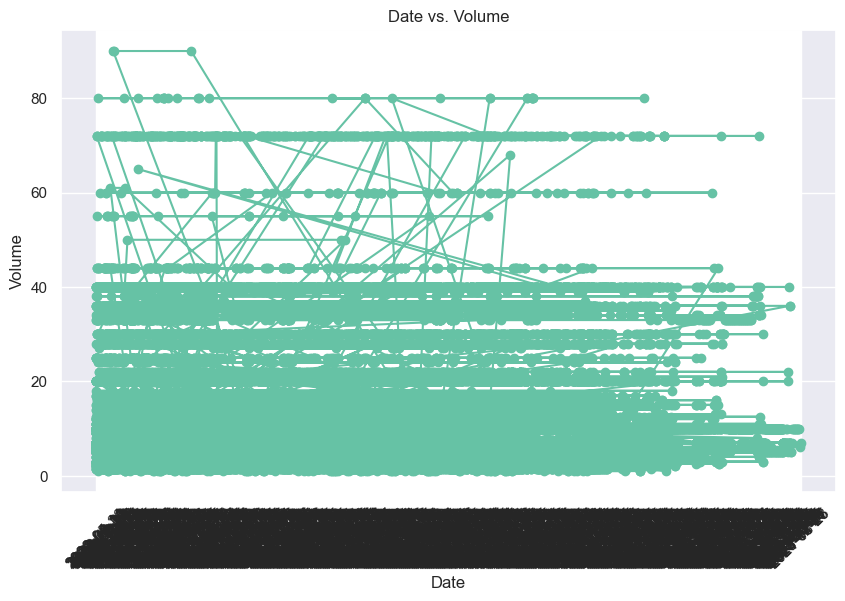

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['container_volumn'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs. Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139105 entries, 0 to 139898
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   delivery_date     139105 non-null  object        
 1   date              139105 non-null  object        
 2   time              139105 non-null  object        
 3   client_name       139105 non-null  object        
 4   order_direction   139105 non-null  object        
 5   material_name     139105 non-null  object        
 6   container_volumn  139105 non-null  float64       
 7   date_time         139105 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 9.6+ MB


In [25]:
df.to_csv('volume_cleaned.csv', index=False, encoding='utf-8-sig')

In [26]:
df123.head()

NameError: name 'df123' is not defined

# 3. TIME SERIES DATA- fix the interval

In [ ]:
df.shape

In [1]:
#df.to_csv('a2.csv', index=False, encoding='utf-8-sig')
import pandas as pd

# Assuming df is your original DataFrame
# You can use the copy() method to create a new copy of the DataFrame
df1 = df.copy()


NameError: name 'df' is not defined

df- original datframe
df1- copy of df

In [ ]:
import pandas as pd

# Assuming 'timestamp' is the column containing the irregular timestamps and 'value' is the column containing the volume data
df1['date_time'] = pd.to_datetime(df1['date_time'])

# Set the 'timestamp' column as the index to create a DatetimeIndex
df1.set_index('date_time', inplace=True)

# Resample to hourly frequency and sum values for each hour
df_hourly = df1.resample('H').sum()


In [ ]:
df_hourly.shape

In [ ]:
# Resample to hourly frequency and sum values for each hour
df_daily = df1.resample('D').sum()


In [ ]:
df_daily.shape

In [ ]:
df_daily.to_csv('df_daily.csv', index=True, encoding='utf-8-sig')

In [ ]:
df_hourly.to_csv('df_hourly.csv', index=True, encoding='utf-8-sig')

In [ ]:
df_daily.isnull().sum()

In [ ]:
df_daily.head

In [ ]:
df_daily.describe()

In [2]:
zero_count = (df_daily['container_volumn'] == 0.0).sum()

NameError: name 'df_daily' is not defined

In [3]:
zero_count

NameError: name 'zero_count' is not defined

In [4]:
# Resample to hourly frequency and sum values for each hour
df_monthly = df1.resample('M').sum()


NameError: name 'df1' is not defined

In [ ]:
df_monthly.shape

In [ ]:
  df_monthly.to_csv("df_monthly.csv", index=True,  encoding='utf-8-sig')

In [ ]:
yearly_counts = df1.resample('Y').size()

# Print the yearly counts
print(yearly_counts)

In [ ]:
monthly_counts = df1.groupby(df1.index.month).size()

# Print the monthly counts
print(monthly_counts)

In [ ]:
year_monthly_counts = df1.groupby([df1.index.year, df1.index.month]).size()

# Group the data by year and count the records for each year
yearly_counts = df1.groupby(df1.index.year).size()

# Print the monthly counts
print("Yearly and Monthly Counts:")
print(year_monthly_counts)